Liczba obserwacji: 756
Liczba cech: 754

Podgląd danych:
   id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0   0       1  0.85247  0.71826  0.57227        240               239   
1   0       1  0.76686  0.69481  0.53966        234               233   
2   0       1  0.85083  0.67604  0.58982        232               231   
3   1       0  0.41121  0.79672  0.59257        178               177   
4   1       0  0.32790  0.79782  0.53028        236               235   

   meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...  \
0          0.008064            0.000087       0.00218  ...   
1          0.008258            0.000073       0.00195  ...   
2          0.008340            0.000060       0.00176  ...   
3          0.010858            0.000183       0.00419  ...   
4          0.008162            0.002669       0.00535  ...   

   tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29  \
0                     1.5620                     2.6445   
1            

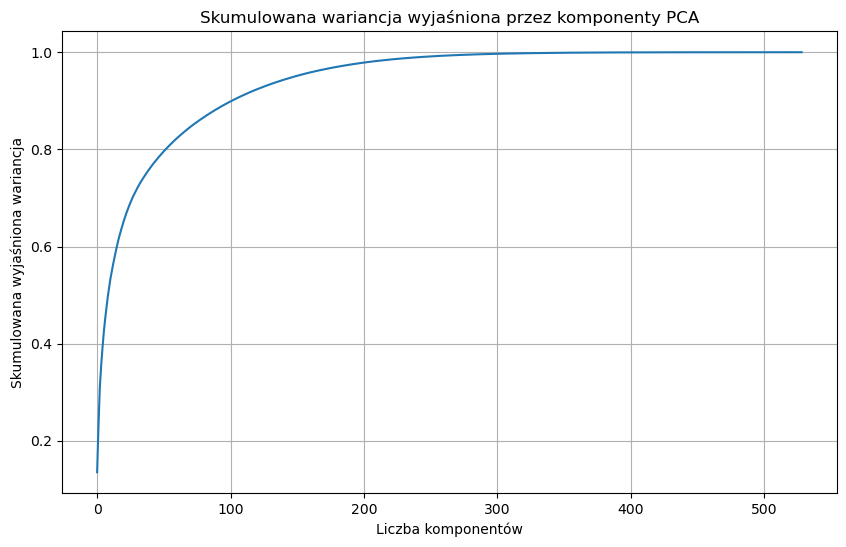

Liczba komponentów PCA: 149

Drzewo decyzyjne - metryki:
Accuracy: 0.7357
AUC ROC: 0.6583

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.48      0.50      0.49        58
           1       0.83      0.82      0.82       169

    accuracy                           0.74       227
   macro avg       0.65      0.66      0.66       227
weighted avg       0.74      0.74      0.74       227



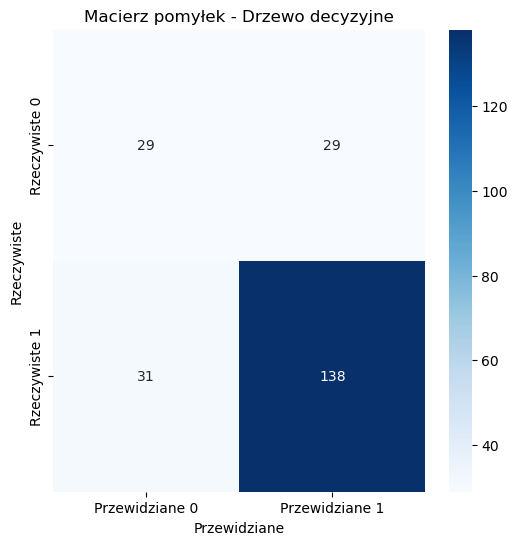

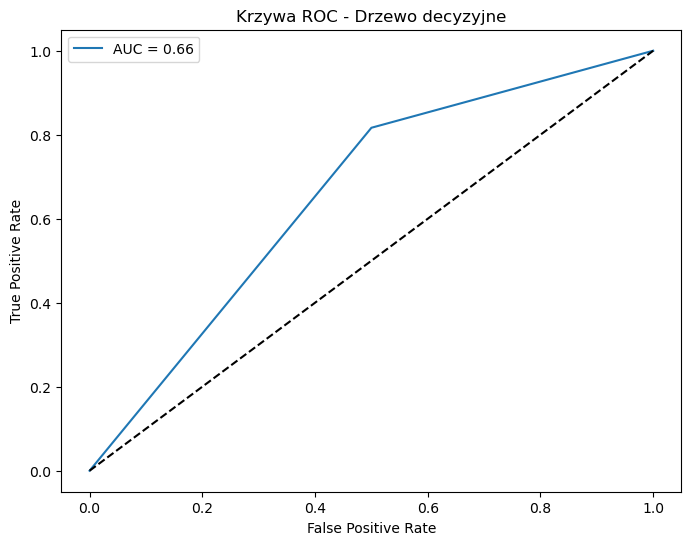


Random Forest - metryki:
Accuracy: 0.7797
AUC ROC: 0.8175

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.70      0.24      0.36        58
           1       0.79      0.96      0.87       169

    accuracy                           0.78       227
   macro avg       0.74      0.60      0.61       227
weighted avg       0.77      0.78      0.74       227



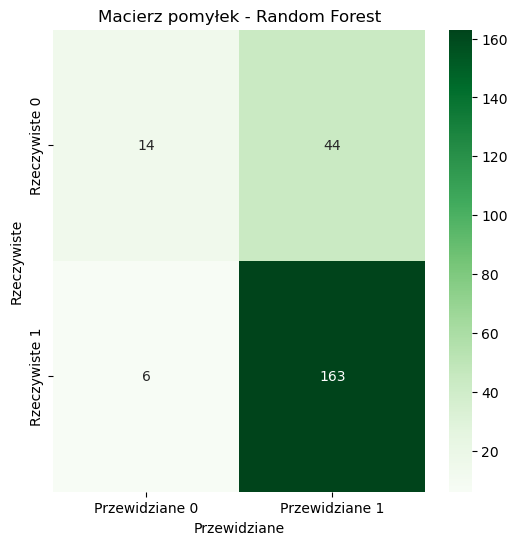

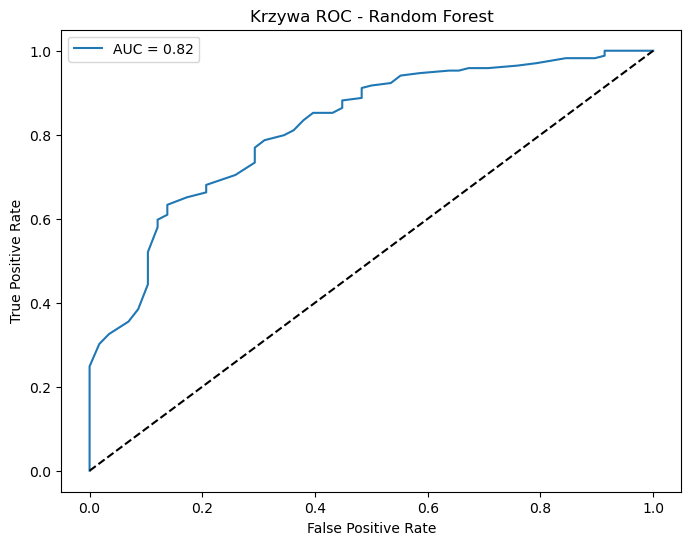


Gradient Boosting - metryki:
Accuracy: 0.8238
AUC ROC: 0.8567

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.75      0.47      0.57        58
           1       0.84      0.95      0.89       169

    accuracy                           0.82       227
   macro avg       0.79      0.71      0.73       227
weighted avg       0.82      0.82      0.81       227



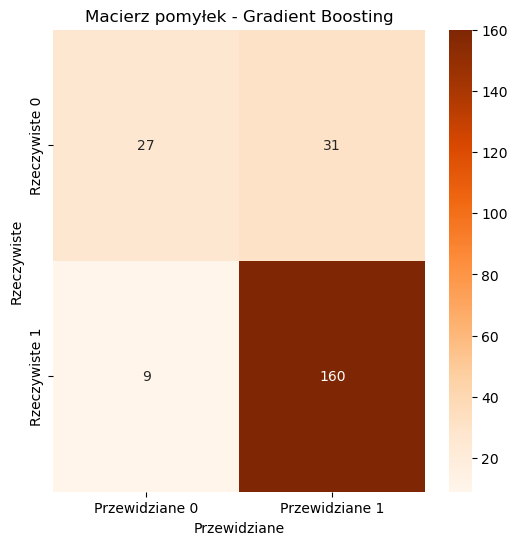

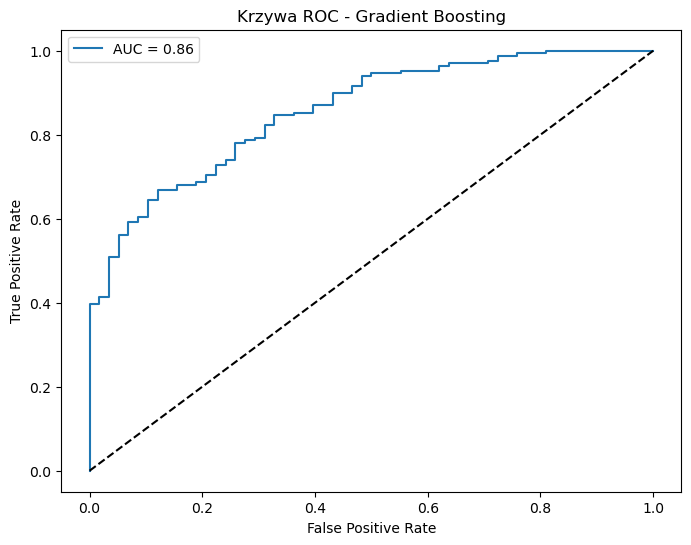

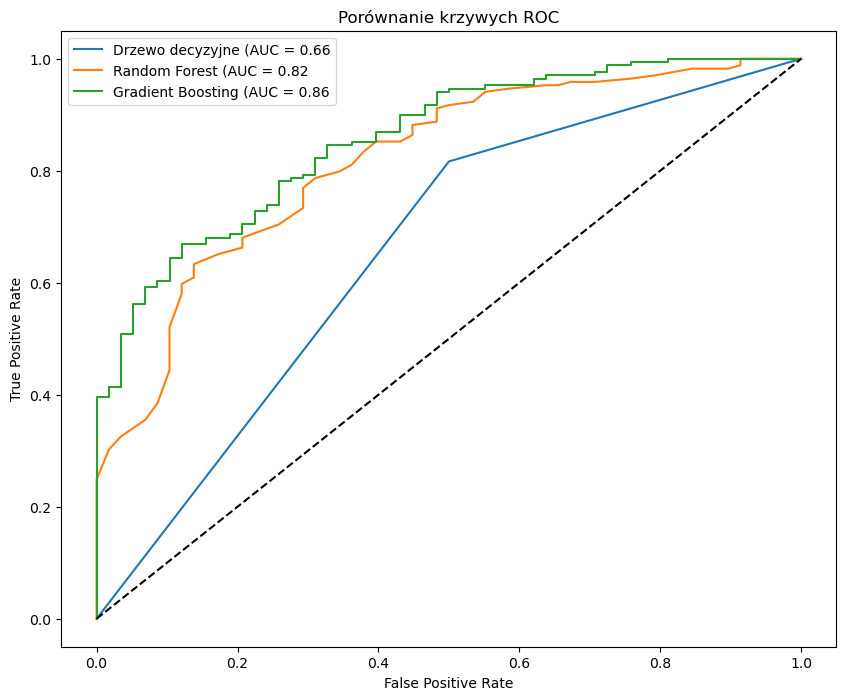

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                           classification_report, roc_auc_score, roc_curve)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

data = pd.read_csv('pd_speech_features.csv')

 print(f"Liczba obserwacji: {data.shape[0]}")
print(f"Liczba cech: {data.shape[1]-1}")  # minus kolumna 'class'
print("\nPodgląd danych:")
print(data.head())
print("\nStatystyki opisowe:")
print(data.describe())
print("\nRozkład klas:")
print(data['class'].value_counts())

data = data.drop(['id', 'gender'], axis=1)

X = data.drop('class', axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA().fit(X_train_scaled)
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Liczba komponentów')
plt.ylabel('Skumulowana wyjaśniona wariancja')
plt.title('Skumulowana wariancja wyjaśniona przez komponenty PCA')
plt.grid()
plt.show()

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print(f"Liczba komponentów PCA: {pca.n_components_}")

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_pca, y_train)

y_pred = dt_clf.predict(X_test_pca)
y_proba = dt_clf.predict_proba(X_test_pca)[:, 1]

print("\nDrzewo decyzyjne - metryki:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC ROC: {roc_auc_score(y_test, y_proba):.4f}")
print("\nRaport klasyfikacji:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Przewidziane 0', 'Przewidziane 1'],
            yticklabels=['Rzeczywiste 0', 'Rzeczywiste 1'])
plt.title('Macierz pomyłek - Drzewo decyzyjne')
plt.ylabel('Rzeczywiste')
plt.xlabel('Przewidziane')
plt.show()


fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC - Drzewo decyzyjne')
plt.legend()
plt.show()


rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_pca, y_train)

y_pred_rf = rf_clf.predict(X_test_pca)
y_proba_rf = rf_clf.predict_proba(X_test_pca)[:, 1]

print("\nRandom Forest - metryki:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"AUC ROC: {roc_auc_score(y_test, y_proba_rf):.4f}")
print("\nRaport klasyfikacji:")
print(classification_report(y_test, y_pred_rf))

plt.figure(figsize=(6,6))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Przewidziane 0', 'Przewidziane 1'],
            yticklabels=['Rzeczywiste 0', 'Rzeczywiste 1'])
plt.title('Macierz pomyłek - Random Forest')
plt.ylabel('Rzeczywiste')
plt.xlabel('Przewidziane')
plt.show()

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f'AUC = {roc_auc_score(y_test, y_proba_rf):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC - Random Forest')
plt.legend()
plt.show()


gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train_pca, y_train)

y_pred_gb = gb_clf.predict(X_test_pca)
y_proba_gb = gb_clf.predict_proba(X_test_pca)[:, 1]

print("\nGradient Boosting - metryki:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print(f"AUC ROC: {roc_auc_score(y_test, y_proba_gb):.4f}")
print("\nRaport klasyfikacji:")
print(classification_report(y_test, y_pred_gb))

plt.figure(figsize=(6,6))
cm_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Przewidziane 0', 'Przewidziane 1'],
            yticklabels=['Rzeczywiste 0', 'Rzeczywiste 1'])
plt.title('Macierz pomyłek - Gradient Boosting')
plt.ylabel('Rzeczywiste')
plt.xlabel('Przewidziane')
plt.show()

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)
plt.figure(figsize=(8,6))
plt.plot(fpr_gb, tpr_gb, label=f'AUC = {roc_auc_score(y_test, y_proba_gb):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC - Gradient Boosting')
plt.legend()
plt.show()

# Porównanie krzywych ROC
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, label=f'Drzewo decyzyjne (AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_proba_rf):.2f}')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_score(y_test, y_proba_gb):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Porównanie krzywych ROC')
plt.legend()
plt.show()